In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# Data points for smaller and larger models
accuracy_data_small = np.array([0.954, 0.971])
cost_data_small = np.array([56, 1096])
accuracy_data_large = np.array([0.89, 0.997])
cost_data_large = np.array([1085, 1895])

# Parameters
total_transactions = 5
n_jurors = 50
juror_cost = 100
time_periods = 1

# Linear model for P(D|A): probability of dispute decreases linearly with accuracy
def P_D_given_A(A):
    return 1 - A

# Generate accuracy range
accuracy_range = np.linspace(0.85, 1.0, 100)

# Smaller model interpolation
cost_interpolation_small = interp1d(accuracy_data_small, cost_data_small, kind='linear', fill_value='extrapolate')
ml_costs_small = np.array([time_periods * cost_interpolation_small(A) for A in accuracy_data_small])

# Larger model interpolation
cost_interpolation_large = interp1d(accuracy_data_large, cost_data_large, kind='linear', fill_value='extrapolate')
ml_costs_large = np.array([time_periods * cost_interpolation_large(A) for A in accuracy_data_large])

# Calculate jury costs
jury_costs = total_transactions * P_D_given_A(accuracy_range) * n_jurors * juror_cost

# Calculate actual data points for plotting
actual_ml_costs_small = cost_data_small * time_periods
actual_ml_costs_large = cost_data_large * time_periods

# Plotting the costs with overlaying lines
plt.figure(figsize=(8, 6))  # Adjusted the width to 8 inches
plt.plot(accuracy_range, jury_costs, label='Jury Cost', linestyle='--')
plt.plot(accuracy_data_large, ml_costs_large, label='Prover Cost (23365 SNN)', linestyle='-')
plt.plot(accuracy_data_small, ml_costs_small, label='Prover Cost (463 SNN)', linestyle='-')
plt.scatter(accuracy_data_large, actual_ml_costs_large, color='red', zorder=5, label='Observed data')
plt.scatter(accuracy_data_small, actual_ml_costs_small, color='red', zorder=5)

# Annotate the red dots with their values for larger model
for i, (x, y) in enumerate(zip(accuracy_data_large, actual_ml_costs_large)):
    plt.annotate(f'({x:.3f}, {y:.0f})', xy=(x, y), xytext=(x, y + 150),
                 textcoords='data', fontsize=10, ha='center', color='black',
                 bbox=dict(facecolor='white', alpha=0.5, edgecolor='none'))

# Annotate the blue dots with their values for smaller model
for i, (x, y) in enumerate(zip(accuracy_data_small, actual_ml_costs_small)):
    plt.annotate(f'({x:.3f}, {y:.0f})', xy=(x, y), xytext=(x, y + 150),
                 textcoords='data', fontsize=10, ha='center', color='black',
                 bbox=dict(facecolor='white', alpha=0.5, edgecolor='none'))

plt.xlabel('Circuit Accuracy')
plt.ylabel('Cost (CPU seconds)')
plt.ylim(bottom=0)  # Set the y-axis limit to start from 0
plt.legend()
plt.grid(True)
#plt.title('Cost Comparison for Smaller and Larger ML Models')
plt.show()


ModuleNotFoundError: No module named 'scipy'

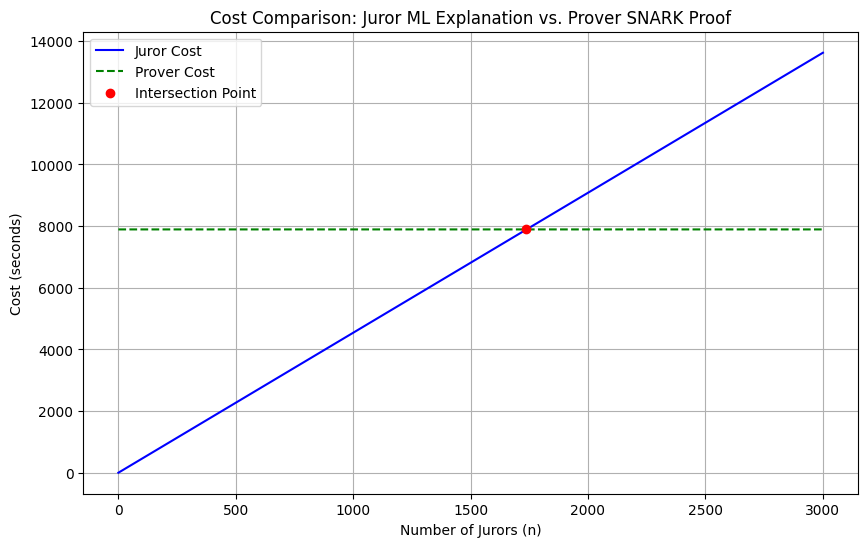

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
juror_cpu_time = 4  # seconds
juror_other_time = 0.54  # seconds
juror_total_time = juror_cpu_time + juror_other_time  # Total time per juror

prover_aggregate_time = 7950  # seconds
prover_cam_time = 42  # seconds
prover_total_time = prover_aggregate_time + prover_cam_time  # Total prover time

prover_total_time = prover_total_time - (56 + 44)

# Generate a range of number of jurors
num_jurors = np.arange(1, 3001, 1)  # From 1 to 200 jurors

# Calculate costs
juror_costs = num_jurors * juror_total_time
prover_costs = np.full_like(num_jurors, prover_total_time)

# Plotting the costs
plt.figure(figsize=(10, 6))

# Plot Juror Costs
plt.plot(num_jurors, juror_costs, label='Juror Cost', color='blue')

# Plot Prover Cost
plt.plot(num_jurors, prover_costs, label='Prover Cost', color='green', linestyle='--')

# Finding the intersection point
intersection_point = np.argwhere(np.diff(np.sign(juror_costs - prover_costs))).flatten()

# Marking the intersection point
if intersection_point.size > 0:
    intersection_num_jurors = num_jurors[intersection_point[0]]
    intersection_cost = juror_costs[intersection_point[0]]
    plt.scatter([intersection_num_jurors], [intersection_cost], color='red', zorder=5, label='Intersection Point')


plt.xlabel('Number of Jurors (n)')
plt.ylabel('Cost (seconds)')
plt.title('Cost Comparison: Juror ML Explanation vs. Prover SNARK Proof')
plt.legend()
plt.grid(True)
plt.show()


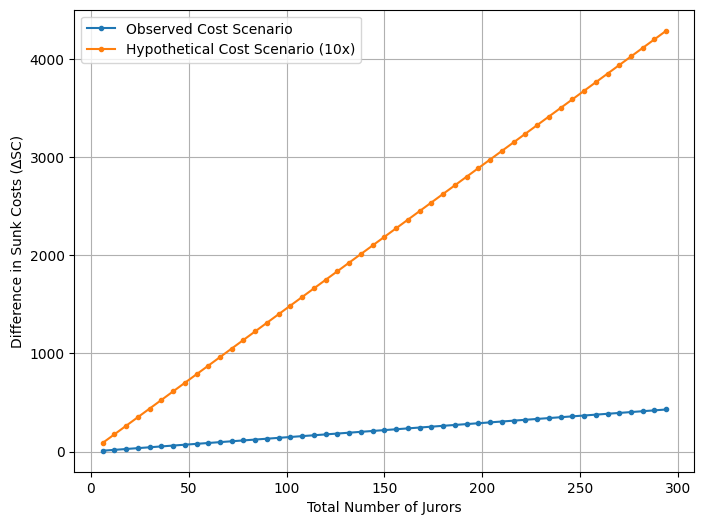

In [42]:
import matplotlib.pyplot as plt

# Define the parameters
j_e = 4  # Cost for running explanation locally in CPU seconds
j_v = 0.5  # Cost for verifying SNARK in CPU seconds
p_c = 0.5  # Certifiers are convinced 50% of the time
p_v = 1.0  # Voters are always convinced

# Initialize lists to store the number of jurors and the corresponding difference in sunk costs for different stakes
num_jurors = []
delta_SC_low_stake = []
delta_SC_high_stake = []

# Calculate the difference in sunk costs for varying numbers of jurors and different stakes
for n_v in range(1, 50):  # Varying the number of voters from 1 to 100
    n_c = 5 * n_v  # Number of certifiers is ten times the number of voters
    
    # Calculate for low stake scenario
    SC_c_low = (1 - p_c) * n_c * j_e
    SC_c_prime_low = (1 - p_c) * n_c * j_v
    SC_v_low = (1 - p_v) * n_v * j_e
    SC_v_prime_low = (1 - p_v) * n_v * j_v

    SC_total_low = SC_c_low + SC_v_low
    SC_total_prime_low = SC_c_prime_low + SC_v_prime_low

    delta_SC_low = SC_total_low - SC_total_prime_low

    # Calculate for high stake scenario (double the stake cost)
    j_e_high = j_e * 10
    j_v_high = j_v * 10
    
    SC_c_high = (1 - p_c) * n_c * j_e_high
    SC_c_prime_high = (1 - p_c) * n_c * j_v_high
    SC_v_high = (1 - p_v) * n_v * j_e_high
    SC_v_prime_high = (1 - p_v) * n_v * j_v_high

    SC_total_high = SC_c_high + SC_v_high
    SC_total_prime_high = SC_c_prime_high + SC_v_prime_high

    delta_SC_high = SC_total_high - SC_total_prime_high

    num_jurors.append(n_v + n_c)  # Total number of jurors (voters + certifiers)
    delta_SC_low_stake.append(delta_SC_low)
    delta_SC_high_stake.append(delta_SC_high)

# Plotting the graph
plt.figure(figsize=(8, 6))  # Adjusted the width to 8 inches

# Plot for low stake scenario
plt.plot(num_jurors, delta_SC_low_stake, marker='.', label='Observed Cost Scenario')
# Plot for high stake scenario
plt.plot(num_jurors, delta_SC_high_stake, marker='.', label='Hypothetical Cost Scenario (10x)')

# Plot the red dashed line at y=7883
#plt.axhline(y=7883, color='red', linestyle='--', label='y=7883')

plt.xlabel('Total Number of Jurors')
plt.ylabel('Difference in Sunk Costs (∆SC)')
#plt.yscale('log') 
#plt.xscale('log') 

plt.legend()
plt.grid(True)
plt.show()
